## Proyecto Individual No. 1
### Machine Learning Operations <br><br>

#### Análisis Exploratorio de datos (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Dataset_transformado/movies.xlsx')
df.head(3)

,actors,director,id,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,862,Toy Story Collection,30000000,"Animation, Comedy, Family",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,...,373554033,81.0,English,Released,NaN,Toy Story,7.7,5415,1995,12.45
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,8844,Grumpy Old Men Collection,65000000,"Adventure, Fantasy, Family",en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",...,262797249,104.0,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,1995,4.04
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch,15602,Father of the Bride Collection,0,"Romance, Comedy",en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",...,0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,1995,0.00


Veo cuantas filas y columnas tiene el dataset

In [2]:
df.shape

(45368, 22)

Veo los nombres de las columnas

In [3]:
df.columns

Index(['actors', 'director', 'id', 'belongs_to_collection', 'budget', 'genres',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return'],
      dtype='object')

Hago una tabla que muestre información de los datos categóricos

In [4]:
df.describe(include = ['O'])

,actors,director,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,spoken_languages,status,tagline,title
count,43020,44533,3235,42985,45357,44427,33573,39158,41478,45288,20398,45368
unique,42655,18828,1108,4064,89,44231,22665,2388,1838,6,20269,42195
top,Georges Méliès,John Ford,The Bowery Boys,Drama,en,No overview found.,Metro-Goldwyn-Mayer (MGM),United States of America,English,Released,Based on a true story.,Cinderella
freq,24,63,29,4998,32198,133,742,17844,22379,44929,7,11


- Hay 42195 títulos distintos de péliculas
- Hay 89 idiomas distintos en las películas
- La mayor cantidad de películas están en inglés
- En el dataframe existen 6 status diferentes de las películas

Veo los diferentes *status* que pueden tener las películas

C:\Users\odett\AppData\Local\Temp\ipykernel_5848\2916634251.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


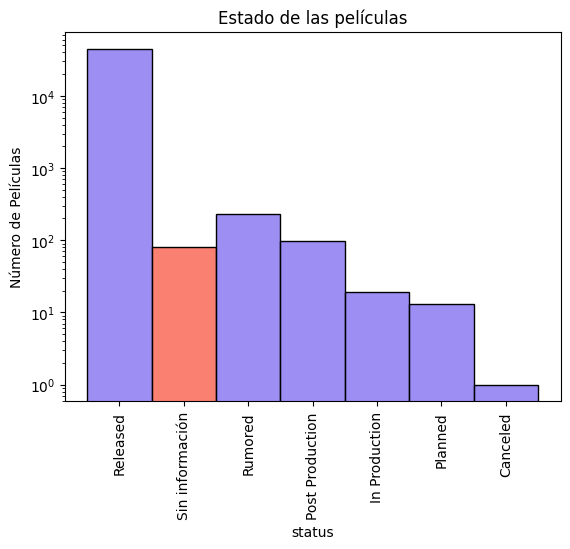

In [5]:
estado = df['status']
df['status'].fillna('Sin información', inplace = True)
ax = sns.histplot(data = estado, color = 'mediumslateblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.patches[1].set_facecolor('salmon')
plt.yscale('log')
plt.ylabel('Número de Películas')
plt.title('Estado de las películas')
plt.show()

La mayoría de las películas sí se han publicado, en cambio, al rededor de 100 o 200 películas están en producción, post producción, etc.<br>
Solo hay muy pocas películas que han sido canceladas

Reviso cuántas películas tienen más de un director

In [6]:
masdirectores = [] # Lista en la que se anota si hay un director o más directores
for i in range(df.shape[0]):
    # Verificar si tienen una coma que separe entre un dirctor y otro
    if (',' in str(df['director'][i])):
        # Si existe al menos una coma, entonces significa que hay más de un director
        masdirectores.append(True)
    else:
        masdirectores.append(False)
directores2oMas = df[masdirectores].shape[0]
print(f'Hay {directores2oMas} películas que tienen más de un director')

Hay 3208 películas que tienen más de un director


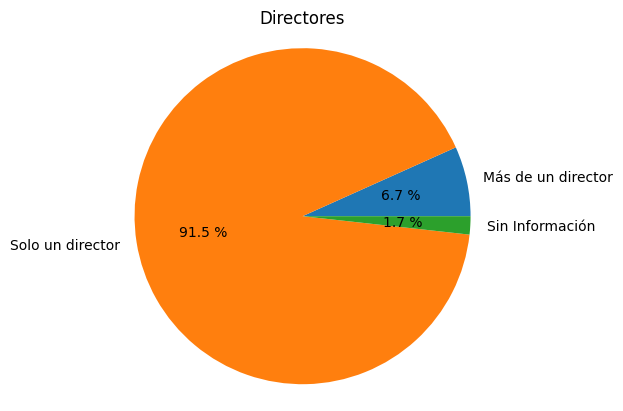

In [7]:
mask = df['director'].isnull()
null_directors = df[mask].shape[0]
undirector = 44533 - df[mask].shape[0]
directores = [directores2oMas, undirector, null_directors]
etiquetas = ["Más de un director", "Solo un director", "Sin Información"]
plt.pie(directores, labels = etiquetas, autopct ="%0.1f %%")
plt.axis("equal")
plt.title('Directores')
plt.show()

- En el gráfico de pie se observa que la mayoría de las películas tienen solo un director
- el 1.7% de los datos son valores nulos
- Solo el 6.7% de las películas son dirigidas por más de un director

Veo los datos cuantitativos

In [8]:
df.describe()

,id,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,45368.000000,4.536800e+04,45368.000000,45368,4.536800e+04,45122.000000,45368.000000,45368.000000,45368.000000,4.536800e+04
mean,108023.367528,4.233329e+06,2.926445,1992-05-14 10:22:04.845706112,1.123208e+07,94.180488,5.623999,110.109504,1991.877667,6.601591e+02
min,2.000000,0.000000e+00,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,26387.750000,0.000000e+00,0.388795,1978-10-05 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,59858.500000,0.000000e+00,1.130301,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,156443.500000,0.000000e+00,3.691695,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,469172.000000,3.800000e+08,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,112161.870159,1.744131e+07,6.010069,NaN,6.439546e+07,38.341096,1.915503,491.784640,24.059377,7.469988e+04


Gráfica donde se muestra el revenue vs budget

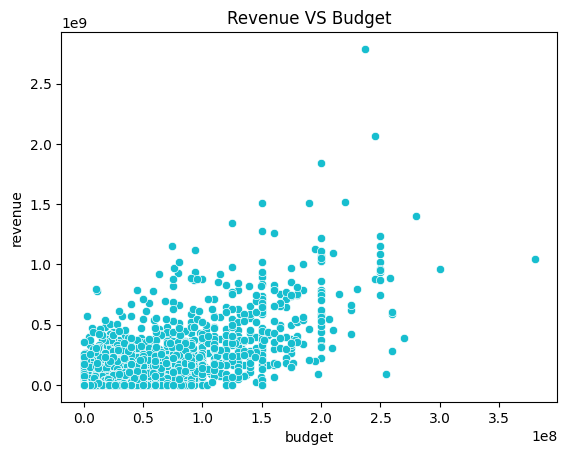

In [9]:
sns.scatterplot(x = df['budget'], y = df['revenue'], color = 'tab:cyan')
plt.title('Revenue VS Budget')
plt.show()

- La mayor parte de las películas fuereon realizadas con un presupuesto menor a 100 millones de dólares
- Las películas con mayores ganancias son las que invirtieron un mayor presupuesto

In [10]:
print('La película más vieja fue estrenada en', df['release_year'].min())
print('La película más nueva fue estrenada en', df['release_year'].max())

La película más vieja fue estrenada en 1874
La película más nueva fue estrenada en 2020


Veo los datos de la película estrenada en 1874

In [11]:
mask = df['release_year'] == 1874
df[mask]

,actors,director,id,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
34895,NaN,P.J.C. Janssen,315946,NaN,0,Documentary,xx,Photo sequence of the rare transit of Venus ov...,0.480371,NaN,...,0,1.0,No Language,Released,NaN,Passage of Venus,6.0,19,1874,0.0


Veo los datos de la película estrenada en 2020

In [12]:
# Veo las películas estrenadas en 1874
mask = df['release_year'] == 2020
df[mask]

,actors,director,id,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
26535,"Kate Winslet, Zoe Saldana, Sam Worthington, Si...",James Cameron,76600,NaN,0,"Action, Adventure, Fantasy, Science Fiction",en,A sequel to Avatar (2009).,6.020055,"Twentieth Century Fox Film Corporation, Lights...",...,0,0.0,"English, Deutsch",In Production,NaN,Avatar 2,0.0,58,2020,0.0


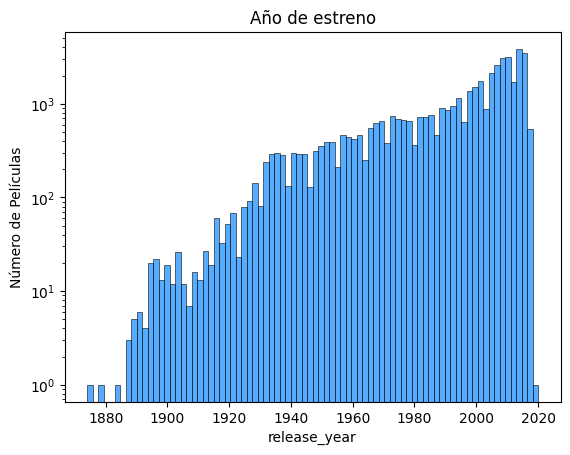

In [13]:
año = df['release_year']
ax = sns.histplot(data = año, color = 'dodgerblue')
plt.yscale('log')
plt.ylabel('Número de Películas')
plt.title('Año de estreno')
plt.show()

La mayor parte de las películas fueron estrenadas en fechas más recientes

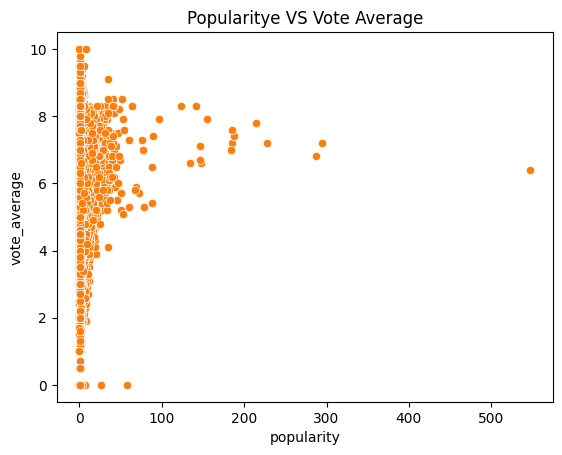

In [14]:
sns.scatterplot(x = df['popularity'], y = df['vote_average'], color = 'tab:orange')
plt.title('Popularitye VS Vote Average')
plt.show()

- La mayoría de las películas tienen un puntaje de popularidad parecido, por debajo de 100
- La película con mayor puntaje de popularidad, no tiene un promedio de votos tan alto

Veo outliers en el campo **vote_average**

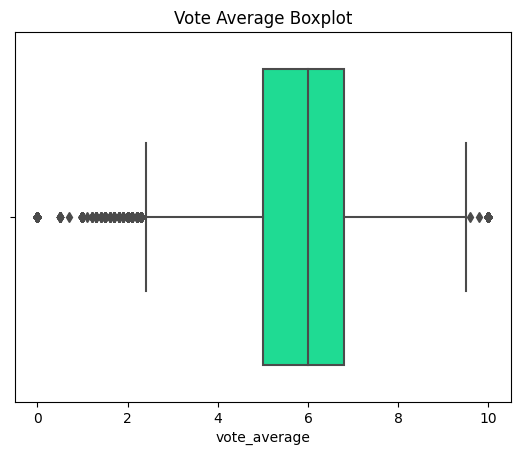

In [15]:
sns.boxplot(data = df, x = 'vote_average', color = 'mediumspringgreen')
plt.title('Vote Average Boxplot')
plt.show()

El promedio del promedio de votaciones está cerca de 6, y los valores que pueden ser considerados outliers, son los aproximadamente mayores a 9.5 y los menores a 2.

Veo outliers en el campo **runtime**

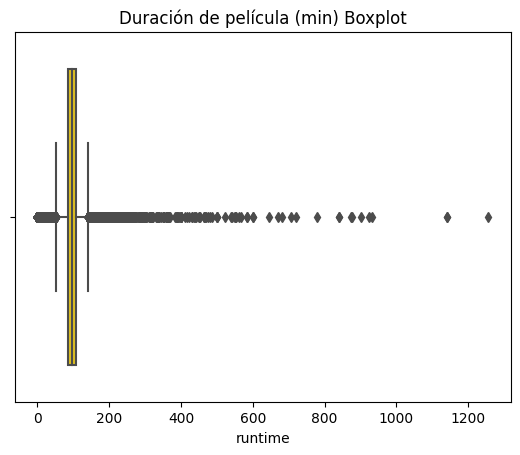

In [16]:
sns.boxplot(data = df, x = 'runtime', color = 'gold')
plt.title('Duración de película (min) Boxplot')
plt.show()

Lo normal es que las películas duren entre 90 y 120 minutos, pero hay películas que duran menos que eso, e incluso, una llega a durar más de 1200. Lo cual a lo mejor podría ser un error al ingresar los datos

Veo cuáles son las películas que duran más de 1000 minutos

In [17]:
mask = df['runtime'] > 1000
df[mask]

,actors,director,id,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
19961,Keith David,Ken Burns,142051,NaN,0,Documentary,en,A survey of the musical form's history and maj...,1.507756,NaN,...,0,1140.0,NaN,Released,NaN,Jazz,5.7,3,2001,0.0
24156,"Richard Chamberlain, Richard Crenna, Raymond B...","Virgil W. Vogel, Harry Falk, Paul Krasny, Bern...",67493,NaN,0,"Drama, History",en,The economic and cultural growth of Colorado s...,0.664727,Universal Television,...,0,1256.0,NaN,Released,NaN,Centennial,7.9,8,1978,0.0
40869,NaN,Ken Burns,126820,NaN,0,Documentary,en,"Chronicles the sport's signature people, place...",0.145073,NaN,...,0,1140.0,English,Released,NaN,Baseball,8.5,4,1994,0.0



Investigando un poco, encontré que la película *Centenial*, que está en la segunda fila del dataframe anterior, en realidad es una serie, y es por esta razón que tiene una duración de 1256 minutos. Por lo cual concluyo que los outliers que encontré en el boxplot puede ser que en realidad la mayoría sean series en vez de películas<br><br>Referencia: https://www.imdb.com/title/tt0076993/

Veo en un histograma la cantidad de películas por idioma. En el histograma recorto la información acerca de algunos idiomas originales de cada película para que se pueda visualizar mejor. Descarto los datos cuya cantidad de películas en su idioma original es menor a 250

C:\Users\odett\AppData\Local\Temp\ipykernel_5848\743599574.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


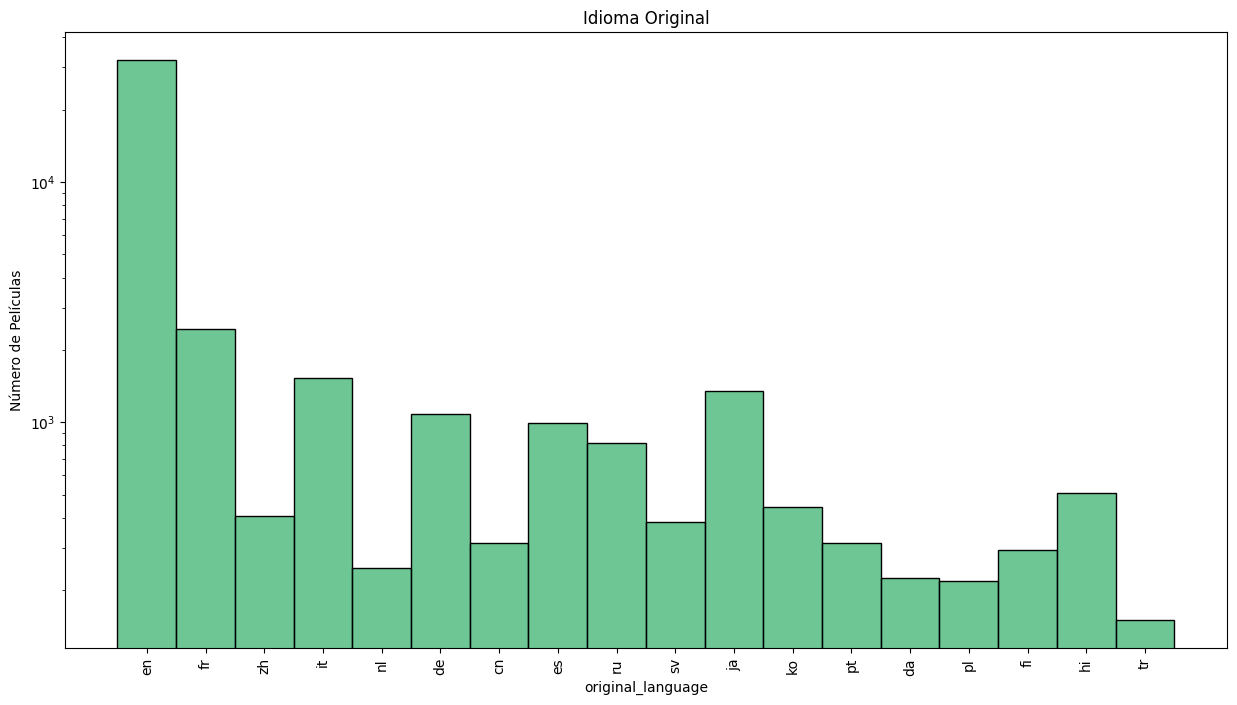

In [18]:
# Hago un nuevo dataframe sin los valores NaN del campo "original_language" del dataframe original
ndf = df.drop(df[df['original_language'].isna()].index)
# Remuevo los datos de las películas cuya cantidad de películas en su idioma original es menor a 250
count_movie = df['original_language'].value_counts()
# Pongo en una lista las películas cuya cantidad de películas en su idioma original es menor a 250
idioma_u250 = count_movie[count_movie < 150].index.to_list()
# Elimino la datods de las peliculas con ayuda de la lista anterior
ndf = ndf.drop(ndf[ndf.original_language.isin(idioma_u250)].index)
idioma = ndf['original_language']
plt.figure(figsize=(15,8))
#f['status'].fillna('Sin información', inplace = True)
ax = sns.histplot(data = idioma, binwidth = 1, color = 'mediumseagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.yscale('log')
plt.ylabel('Número de Películas')
plt.title('Idioma Original')
plt.show()

Los primeros 5 idiomas en los que hay más películas son en:
1. Inglés
2. Francés
3. Italiano
4. Japonés
5. Alemán

Hago una nube de palabras con los títulos de las películas para tener una idea de cuáles son las palabras más frecuentes en los títulos

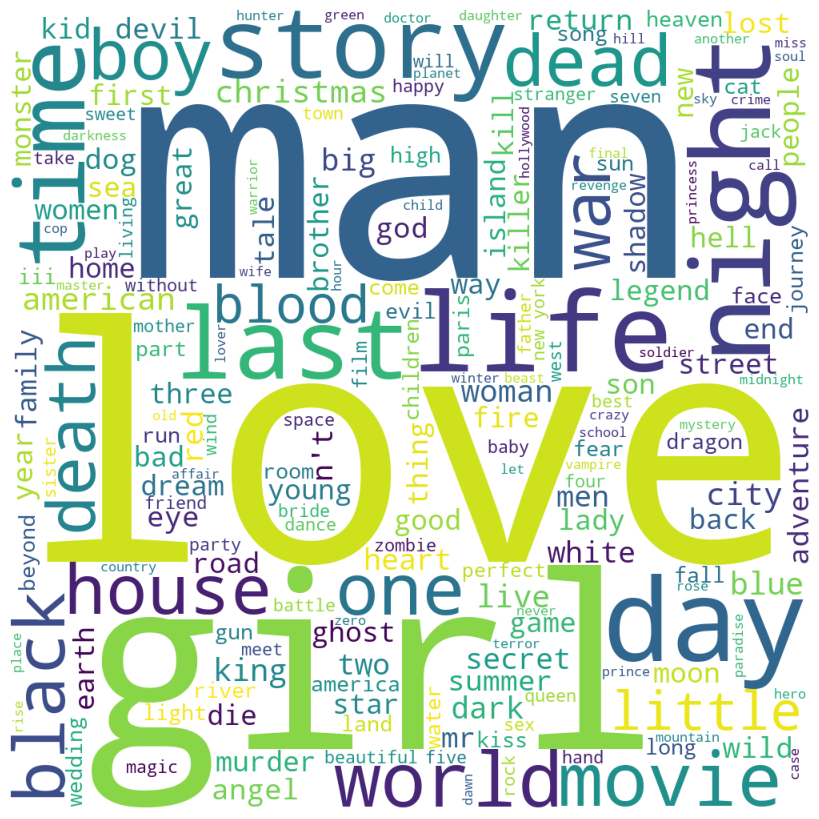

In [19]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

lista = df['title'].to_list()
text = ' '.join(lista) # Convierto la columna en un string
token = word_tokenize(text)
tokenlist = []
for word in token:
    word = word.lower()
    if len(word) >= 3:
        tokenlist.append(word)
text = ' '.join(tokenlist)
wordcloud = WordCloud(width=1000, height=1000, background_color="White", min_font_size=8).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()